Clustering

Clustering is an unsupervised learning method where similar data points are grouped into clusters.

1. Market Segmentation: Identify target customer groups to customize marketing strategies or improve product offerings.  
2. Statistical Data Analysis: Organize data into clusters to reveal hidden structures or trends.  
3. Social Network Analysis: Identify groups of individuals who interact frequently or share common interests.  
4. Image Segmentation: Group pixels with similar features (e.g., color, texture) to segment objects or areas in an image.  
5. Anomaly Detection: Detect anomalies in data, such as fraudulent transactions, equipment failures, or unusual behaviors.  

Types of clustering methods

- Partitioning Clustering
- Density-Based Clustering
- Distributional Clustering
- Hierarchical Clustering
- Fuzzy Clustering

Partitioning Clustering

- K-Means Clustering

In [1]:
import numpy as np

# Parameters for clusters
cluster_centers = [(2, 2, 2), (8, 8, 8), (15, 15, 15)]
scatter_std = 1.5  # Standard deviation for scattering
points_per_cluster = 6  # Total points per cluster

# Generate points for each cluster
x, y, z = [], [], []

for center in cluster_centers:
    cluster_x = np.random.normal(loc=center[0], scale=scatter_std, size=points_per_cluster)
    cluster_y = np.random.normal(loc=center[1], scale=scatter_std, size=points_per_cluster)
    cluster_z = np.random.normal(loc=center[2], scale=scatter_std, size=points_per_cluster)
    
    x.extend(cluster_x)
    y.extend(cluster_y)
    z.extend(cluster_z)

print("x:", x)
print("y:", y)
print("z:", z)


x: [2.326562369429165, 2.9813287451897765, 1.3527742837458168, 1.3621256142600178, 1.0204518089375985, 1.1644470459325051, 7.380472139620997, 9.561559308536895, 7.767531249219419, 9.15952304801645, 8.564557758027247, 4.551501502022408, 13.257986257744523, 14.18287352432152, 15.300063496328008, 15.549632379459675, 12.614999725093107, 14.501402950648572]
y: [2.613775692423385, -2.918346696570274, 1.0013975823546222, 0.6520410090002275, 1.0642074094601177, 0.5338177925847132, 8.82863237617881, 10.367790181356995, 5.489358320507659, 9.069943078010505, 9.76091607146489, 6.572118815639498, 16.051831665785006, 13.261737918259776, 16.544428641529322, 13.580427440815761, 15.918902263578033, 15.239779265518367]
z: [4.668188752471082, 2.9656465908184684, 3.30468600208766, 0.35710289575543386, -0.25170884593590515, 2.235936409029499, 8.132597480411723, 8.580051545122902, 6.534275883300685, 7.550616251389578, 7.449085061626253, 7.628647404727455, 12.305235215595605, 18.23729618426713, 11.5937991644

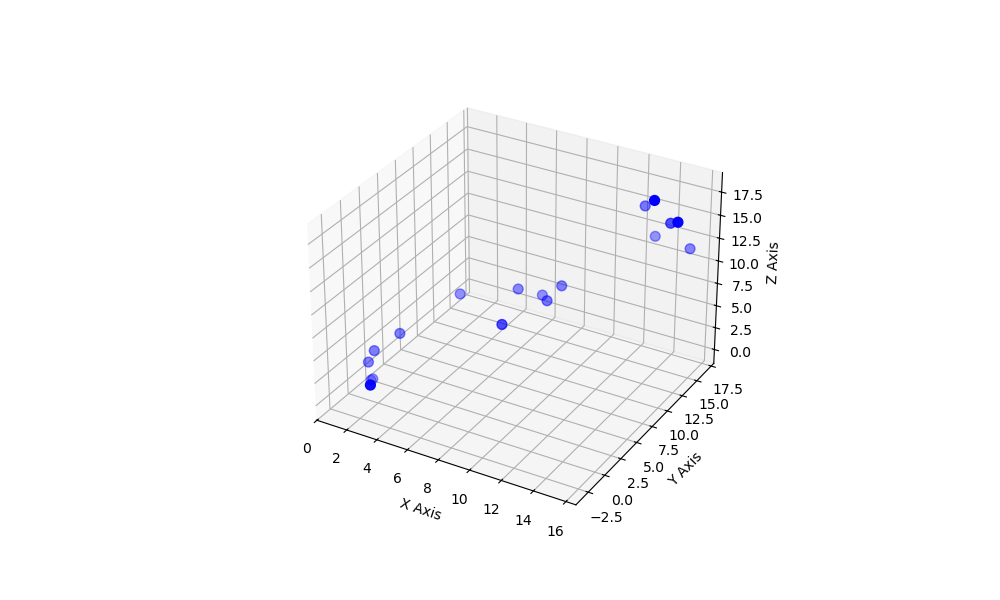

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# # Data points (Cluster 1 and Cluster 2)
# x = [0.2, 3.8, 0.6, 6.4, 3.0, 7.1, 5.9]
# y = [1.5, 3.0, 1.8, 5.9, 4.3, 2.4, 6.1]
# z = [1.7, 2.3, 0.4, 6.2, 3.8, 2.8, 6.5]

# Colors: Cluster 1 = Blue, Cluster 2 = Red
colors = ['blue'for i in range(len(x))]

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [3]:
# kmeans algorithm
import random

k = 3
random_points = []
for i in range(k):
    random_point = random.randint(0, len(x)-1)
    random_points.append(random_point)
print(random_points)

distances = [[] for i in range(len(random_points))]

for n, i in enumerate(random_points):
    for p in range(len(x)):
        distance = (x[i] - x[p])**2 + (y[i] - y[p])**2 + (z[i] - z[p])**2
        distances[n].append(distance)

print(distances)

cluster_col = [row.index(min(row)) for row in zip(*distances)]
cluster_col


[14, 10, 6]
[[410.33890265703195, 604.9958665646533, 504.8220879048582, 573.0974401025608, 583.8606193613351, 543.7249075389178, 134.23335636343546, 80.16396769416808, 204.55239768927942, 109.92149950532315, 108.56173533331503, 230.70097668685318, 4.918872483677472, 56.16022447008716, 0.0, 31.480716314527086, 22.12134310261596, 12.512494303735236], [97.72758634816934, 212.03737107219212, 145.91502860568775, 185.1428447301918, 191.8485029296251, 167.07790007344425, 2.7384008668467477, 2.6413934637687526, 19.718332708253897, 0.8417359564700071, 0.0, 26.30529108767913, 85.18608441471494, 160.2067248794595, 108.56173533331503, 142.62808242289105, 117.6135208411772, 119.05388484139729], [76.16857539909122, 184.04136143584134, 120.90747520190746, 163.5354573211632, 171.0327462445436, 142.2135287323249, 0.0, 7.32636312767705, 13.855197900993161, 3.561955140415318, 2.7384008668467477, 13.34889399607495, 104.13068585518931, 168.03002524150173, 134.23335636343546, 156.8606220178969, 130.55096242

[2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0]

In [4]:
fixed_colors = [
    'blue', 
    'red', 
    'indigo', 
    'green', 
    'orange', 
    'purple', 
    'magenta', 
    'lime', 
    'teal', 
    'violet', 
    'gold', 
    'turquoise',  
    'crimson', 
    'coral', 
    'fuchsia', 
    'aqua'
]

colors = [fixed_colors[c] for c in cluster_col]

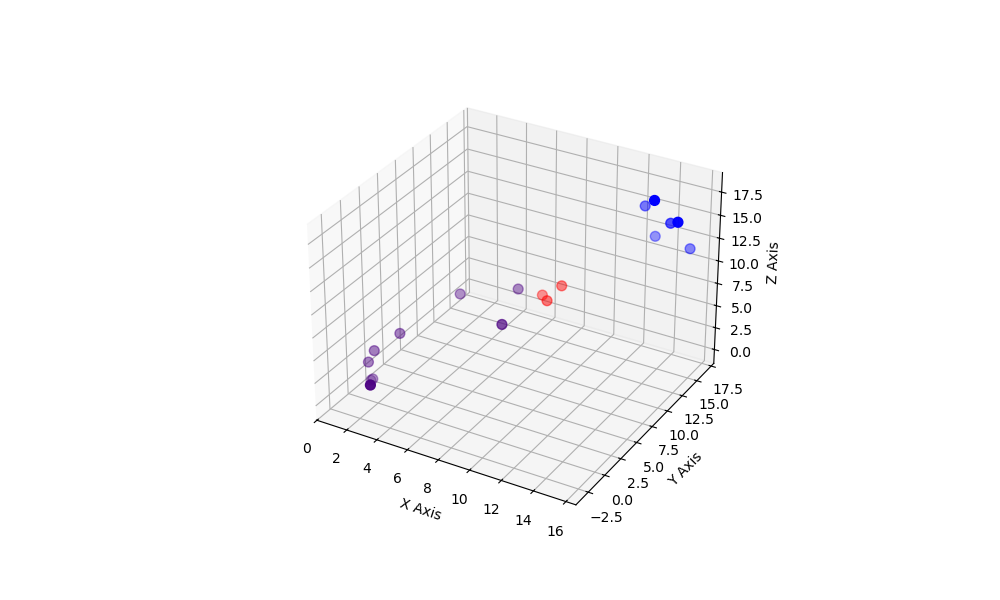

In [5]:
# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [6]:
prev_cluster_col = [-1] * len(x)    
iters = 0
cluster_dict = {j:[] for j in range(k)}
print(cluster_dict)
while(True):
    for key in cluster_dict:
        cluster_dict[key] = []
    
    for i, c in enumerate(cluster_col):
        cluster_dict[c].append(i)
    print(cluster_dict)
    # recalculate centroids
    centroids = []
    for k,v in cluster_dict.items():
        # Ensure there are no division by zero issues
        xs = [x[i] for i in v]
        xc = sum(xs)/len(xs) if len(xs) > 0 else 0  # Handle division by zero

        ys = [y[i] for i in v]
        yc = sum(ys)/len(ys) if len(ys) > 0 else 0  # Handle division by zero

        zs = [z[i] for i in v]
        zc = sum(zs)/len(zs) if len(zs) > 0 else 0  # Handle division by zero

        centroids.append([xc, yc, zc])

    distances = [[] for i in range(k+1)]

    for i, n in enumerate(centroids):
        for p in range(len(x)):
            distance = (n[0] - x[p])**2 + (n[1] - y[p])**2 + (n[2] - z[p])**2
            distances[i].append(distance)

    cluster_col = [row.index(min(row)) for row in zip(*distances)]
    print(cluster_col)
    
    if cluster_col == prev_cluster_col:
        break

    iters += 1
    prev_cluster_col = cluster_col
print(iters)

{0: [], 1: [], 2: []}
{0: [12, 13, 14, 15, 16, 17], 1: [7, 9, 10], 2: [0, 1, 2, 3, 4, 5, 6, 8, 11]}
[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0]
{0: [12, 13, 14, 15, 16, 17], 1: [6, 7, 8, 9, 10], 2: [0, 1, 2, 3, 4, 5, 11]}
[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
{0: [12, 13, 14, 15, 16, 17], 1: [6, 7, 8, 9, 10, 11], 2: [0, 1, 2, 3, 4, 5]}
[2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
2


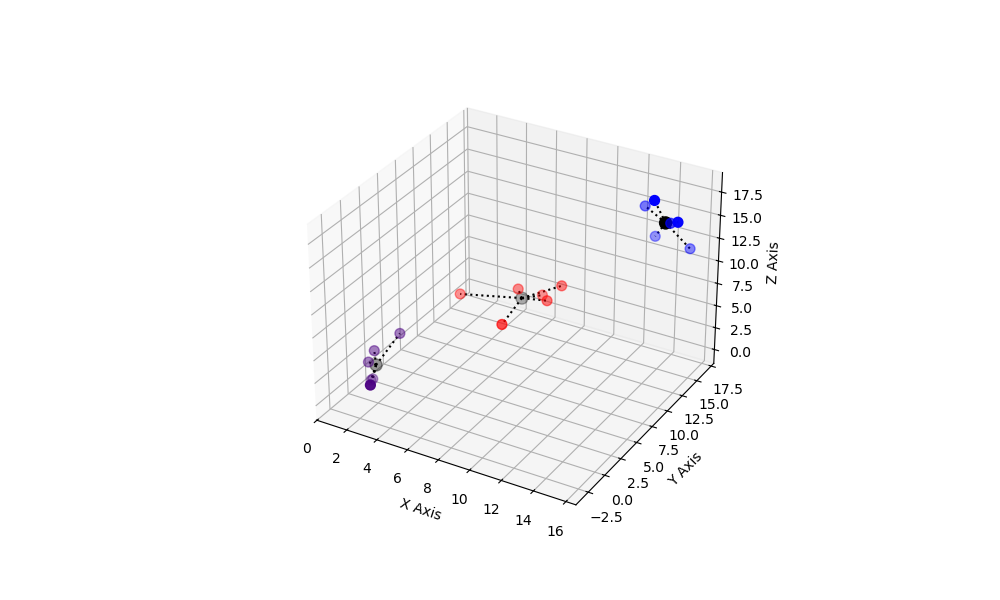

In [7]:
colors = [fixed_colors[c] for c in cluster_col]

cx = []
cy = []
cz = []

for c in centroids:
    cx.append(c[0])
    cy.append(c[1])
    cz.append(c[2])


# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points
ax.scatter(cx, cy, cz, c = 'black', s = 75)

# To plot dotted lines between points and centroids
for i, p in enumerate(cluster_col):
    # Plot the dotted line between the central point and the connected point
    ax.plot([cx[p], x[i]], [cy[p], y[i]], [cz[p], z[i]], linestyle=':', color='black')

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

Hierarchical Clustering

- Agglomerative
- Divisive

Agglomerative

Initially each data point is a cluster.

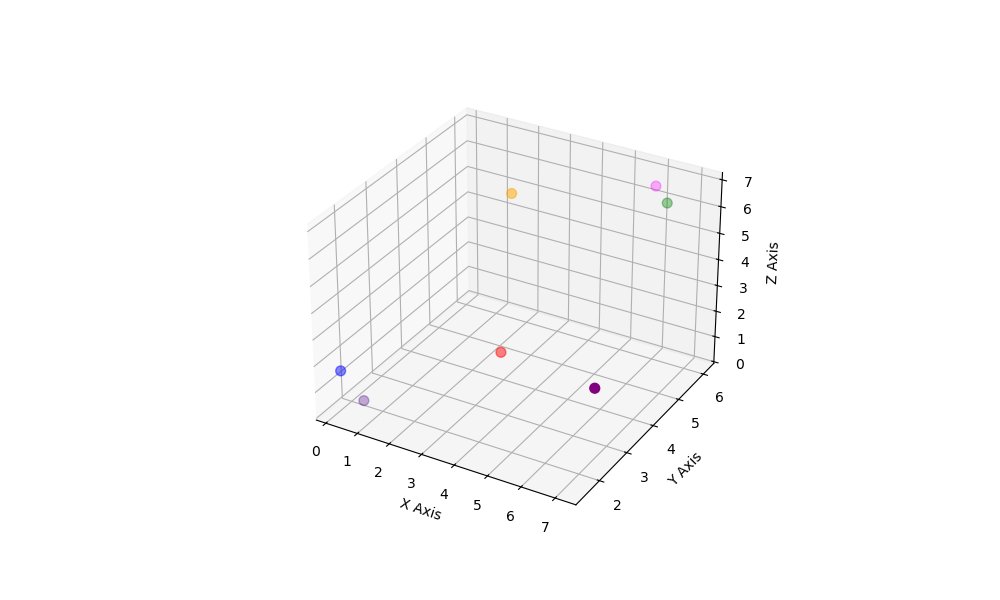

In [8]:
# Data points 
x = [0.2, 3.8, 0.6, 6.4, 3.0, 7.1, 5.9]
y = [1.5, 3.0, 1.8, 5.9, 4.3, 2.4, 6.1]
z = [1.7, 2.3, 0.4, 6.2, 6.8, 2.8, 6.5]

# Colors: Cluster 1 = Blue, Cluster 2 = Red
colors = [fixed_colors[i] for i in range(len(x))]

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

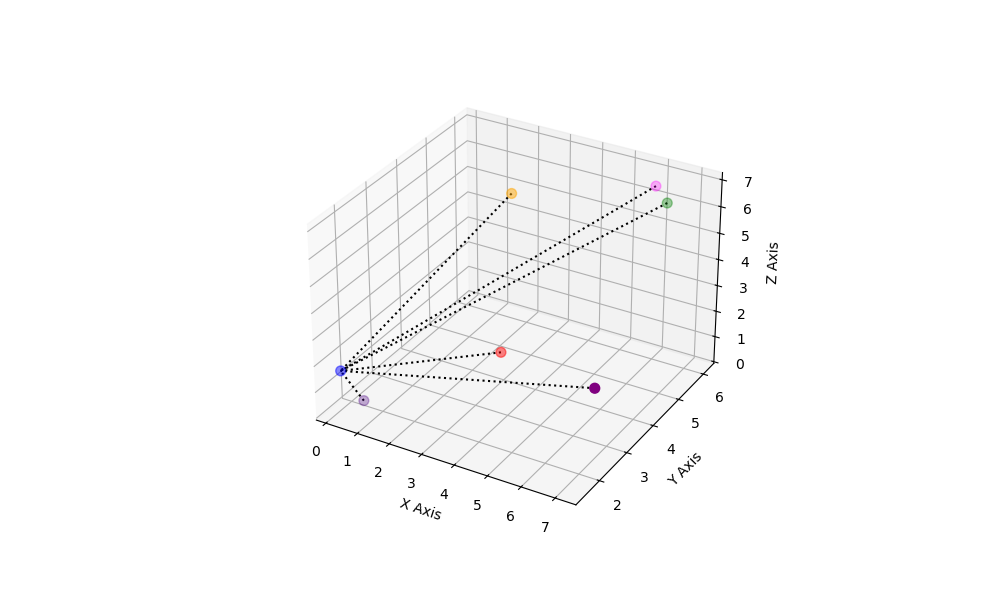

In [9]:
# calculate distances between the clusters

distance_matrix = [[] for _ in range(len(x))]

for i in range(len(x)):
    for j in range(len(x)):
        xd = (x[i] - x[j])**2
        yd = (y[i] - y[j])**2
        zd = (z[i] - z[j])**2
        distance_matrix[i].append(xd + yd + zd)

# Colors: Cluster 1 = Blue, Cluster 2 = Red
colors = [fixed_colors[i] for i in range(len(x))]

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

"""The below code snippet displays the distances from one point to all other points, this code only
works for the first data point."""
for i in range(1):
    for j in range(i+1, len(x)):
        ax.plot([x[j], x[i]], [y[j], y[i]], [z[j], z[i]], linestyle=':', color='black')

"""This code snippet displays lines between all points but as the diagram gets overcrowded, lines are displayed only for one point."""
# # To plot dotted lines between points to visualize distance calculation
# for i in range(len(x)):
#     for j in range(i+1, len(x)):
#         ax.plot([x[j], x[i]], [y[j], y[i]], [z[j], z[i]], linestyle=':', color='black')


# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [10]:
def get_min_with_index(row):
    non_zero_values = [(value, idx) for idx, value in enumerate(row) if value != 0]
    return min(non_zero_values, default=(None, None), key=lambda x: x[0])

# Get the min non-zero value and its index for each row
min_values_with_indices = [get_min_with_index(row) for row in distance_matrix]

# Filter out tuples where the value is None
valid_values = [(value, row_index, col_index) for row_index, (value, col_index) in enumerate(min_values_with_indices) if value is not None]

# Find the tuple with the minimum value
min_tuple = min(valid_values, default=None, key=lambda x: x[0])
min_tuple


(0.3799999999999996, 3, 6)

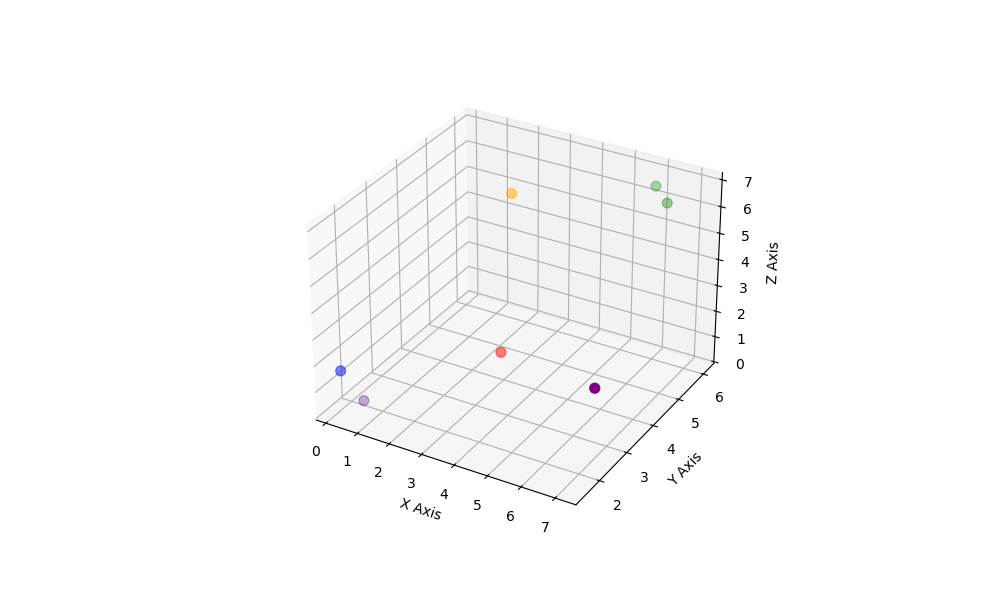

In [11]:
colors = [fixed_colors[i] for i in range(len(x))]
common_color = fixed_colors[min_tuple[1]]  
colors[min_tuple[1]] = common_color 
colors[min_tuple[2]] = common_color

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [12]:
# update the distance_matrix
for i in range(len(x)):
    if distance_matrix[min_tuple[1]][i] <= distance_matrix[min_tuple[2]][i]:
        distance_matrix[min_tuple[2]][i] = distance_matrix[min_tuple[1]][i]
    else:
        distance_matrix[min_tuple[1]][i] = distance_matrix[min_tuple[2]][i]

# Get the min non-zero value and its index for each row
min_values_with_indices = [get_min_with_index(row) for row in distance_matrix]

# Filter out tuples where the value is None
valid_values = [(value, row_index, col_index) for row_index, (value, col_index) in enumerate(min_values_with_indices) if value is not None]

# Find the tuple with the minimum value
min_tuple = min(valid_values, default=None, key=lambda x: x[0])
min_tuple
    

(1.9399999999999995, 0, 2)

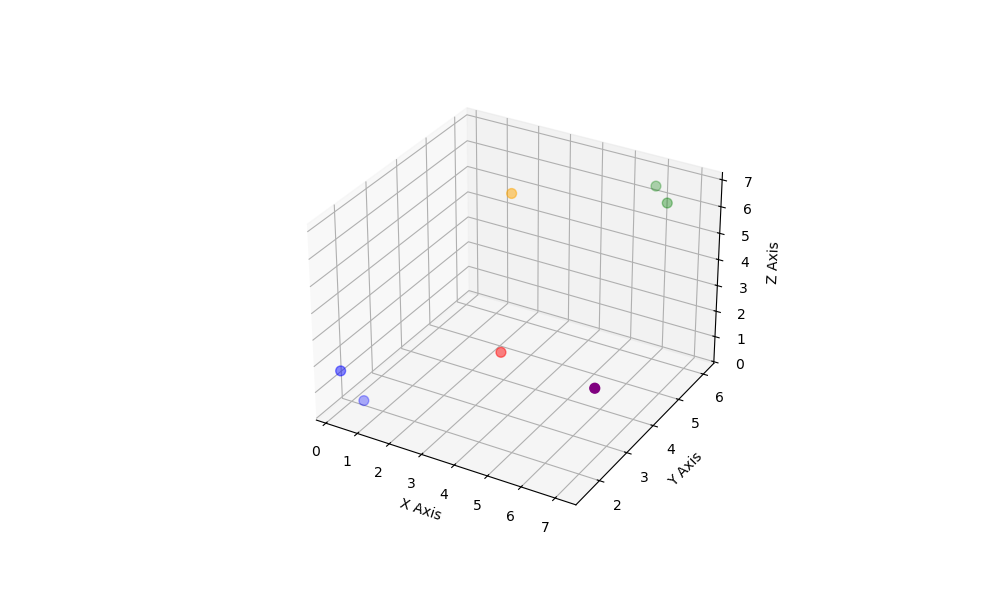

In [13]:
common_color = fixed_colors[min_tuple[1]]  
colors[min_tuple[1]] = common_color 
colors[min_tuple[2]] = common_color

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [14]:
# update the distance_matrix
for i in range(len(x)):
    if distance_matrix[min_tuple[1]][i] <= distance_matrix[min_tuple[2]][i]:
        distance_matrix[min_tuple[2]][i] = distance_matrix[min_tuple[1]][i]
    else:
        distance_matrix[min_tuple[1]][i] = distance_matrix[min_tuple[2]][i]

# Get the min non-zero value and its index for each row
min_values_with_indices = [get_min_with_index(row) for row in distance_matrix]

# Filter out tuples where the value is None
valid_values = [(value, row_index, col_index) for row_index, (value, col_index) in enumerate(min_values_with_indices) if value is not None]

min_value = min(valid_values, key=lambda x: x[0])[0] if valid_values else None

min_tuples = [tup for tup in valid_values if tup[0] == min_value]
min_tuples
    

[(11.499999999999998, 1, 5), (11.499999999999998, 5, 1)]

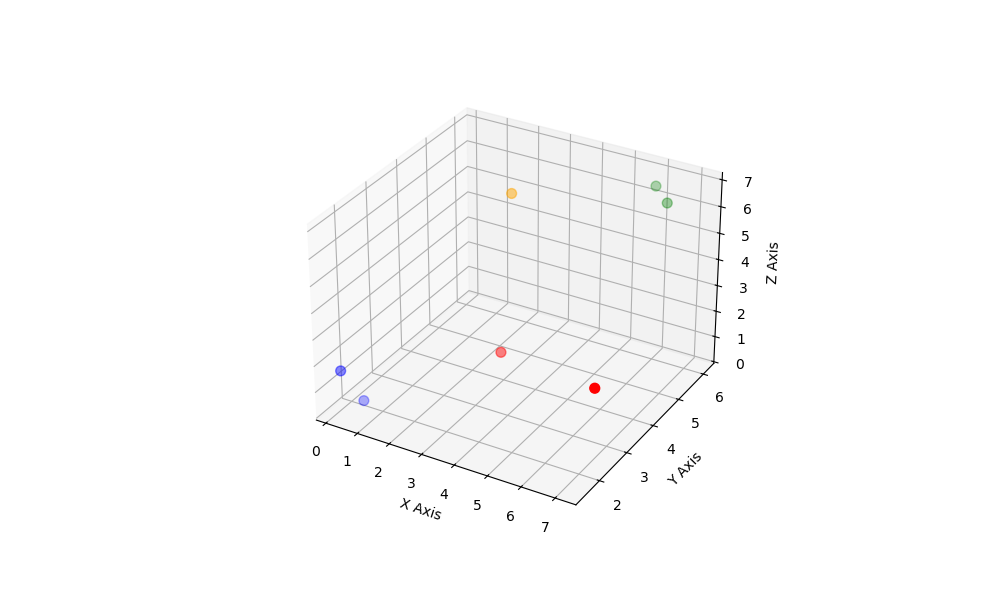

In [15]:
common_color = fixed_colors[min_tuples[0][1]]  
colors[min_tuples[0][1]] = common_color 
colors[min_tuples[0][2]] = common_color

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [16]:
# update the distance_matrix
for min_tuple in min_tuples:
    for i in range(len(x)):
        if distance_matrix[min_tuple[1]][i] <= distance_matrix[min_tuple[2]][i]:
            distance_matrix[min_tuple[2]][i] = distance_matrix[min_tuple[1]][i]
        else:
            distance_matrix[min_tuple[1]][i] = distance_matrix[min_tuple[2]][i]

# Get the min non-zero value and its index for each row
min_values_with_indices = [get_min_with_index(row) for row in distance_matrix]

# Filter out tuples where the value is None
valid_values = [(value, row_index, col_index) for row_index, (value, col_index) in enumerate(min_values_with_indices) if value is not None]
valid_values

[(15.289999999999997, 0, 1),
 (15.289999999999997, 1, 2),
 (15.289999999999997, 2, 1),
 (11.740000000000002, 3, 4),
 (11.740000000000002, 4, 6),
 (15.289999999999997, 5, 2),
 (11.740000000000002, 6, 4)]

In [17]:
min_value = min(valid_values, key=lambda x: x[0])[0] if valid_values else None

min_tuples = [tup for tup in valid_values if tup[0] == min_value]
min_tuples

[(11.740000000000002, 3, 4),
 (11.740000000000002, 4, 6),
 (11.740000000000002, 6, 4)]

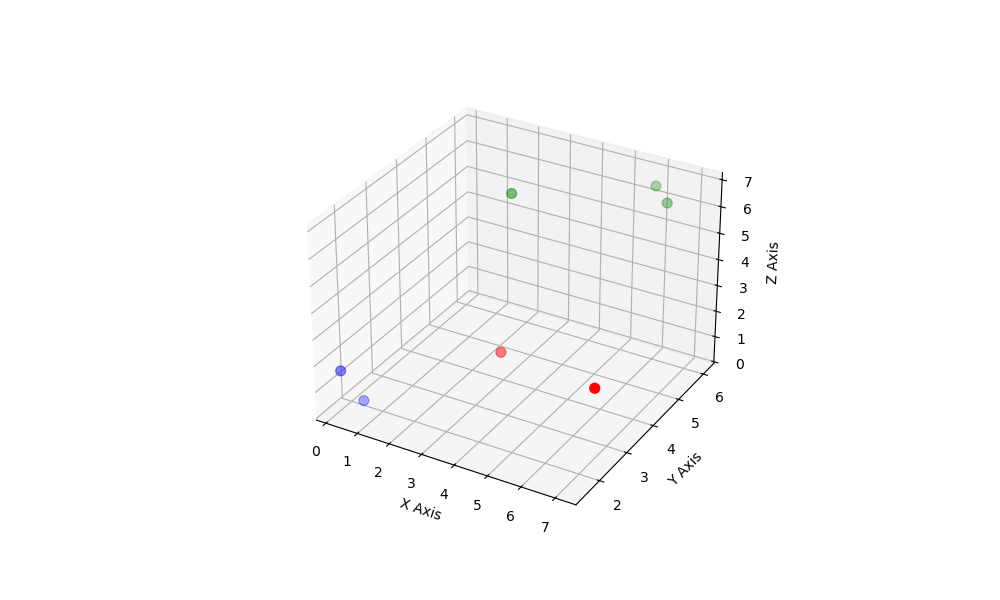

In [18]:
common_color = fixed_colors[min_tuples[0][1]]  
colors[min_tuples[0][1]] = common_color 
colors[min_tuples[0][2]] = common_color

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [19]:
# update the distance_matrix
for min_tuple in min_tuples:
    for i in range(len(x)):
        if distance_matrix[min_tuple[1]][i] <= distance_matrix[min_tuple[2]][i]:
            distance_matrix[min_tuple[2]][i] = distance_matrix[min_tuple[1]][i]
        else:
            distance_matrix[min_tuple[1]][i] = distance_matrix[min_tuple[2]][i]

# Get the min non-zero value and its index for each row
min_values_with_indices = [get_min_with_index(row) for row in distance_matrix]

# Filter out tuples where the value is None
valid_values = [(value, row_index, col_index) for row_index, (value, col_index) in enumerate(min_values_with_indices) if value is not None]
valid_values

[(15.289999999999997, 0, 1),
 (15.289999999999997, 1, 2),
 (15.289999999999997, 2, 1),
 (22.58, 3, 1),
 (22.58, 4, 1),
 (15.289999999999997, 5, 2),
 (22.58, 6, 1)]

In [20]:
min_value = min(valid_values, key=lambda x: x[0])[0] if valid_values else None

min_tuples = [tup for tup in valid_values if tup[0] == min_value]
min_tuples

[(15.289999999999997, 0, 1),
 (15.289999999999997, 1, 2),
 (15.289999999999997, 2, 1),
 (15.289999999999997, 5, 2)]

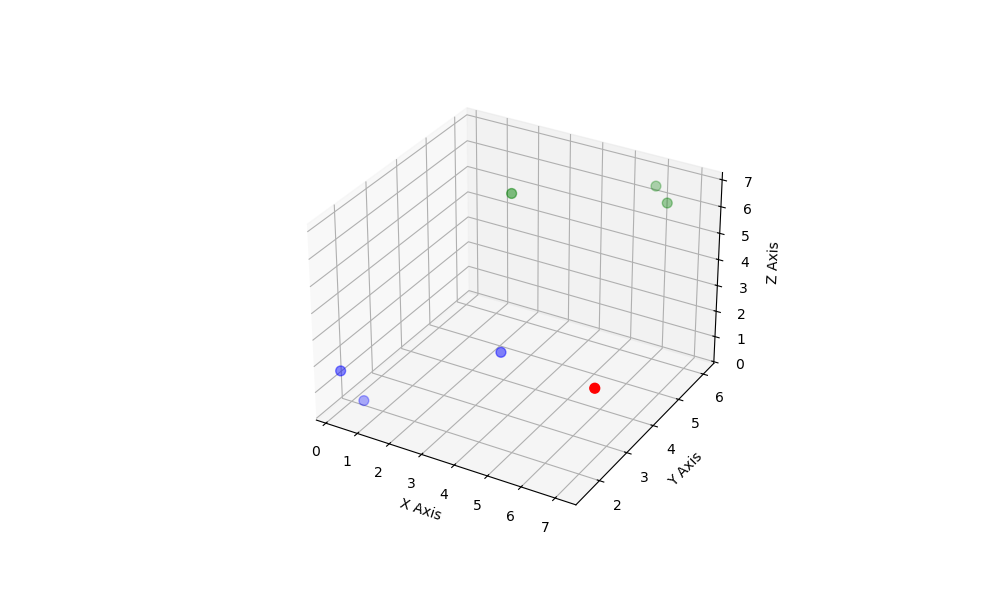

In [21]:
common_color = fixed_colors[min_tuples[0][1]]  
colors[min_tuples[0][1]] = common_color 
colors[min_tuples[0][2]] = common_color

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

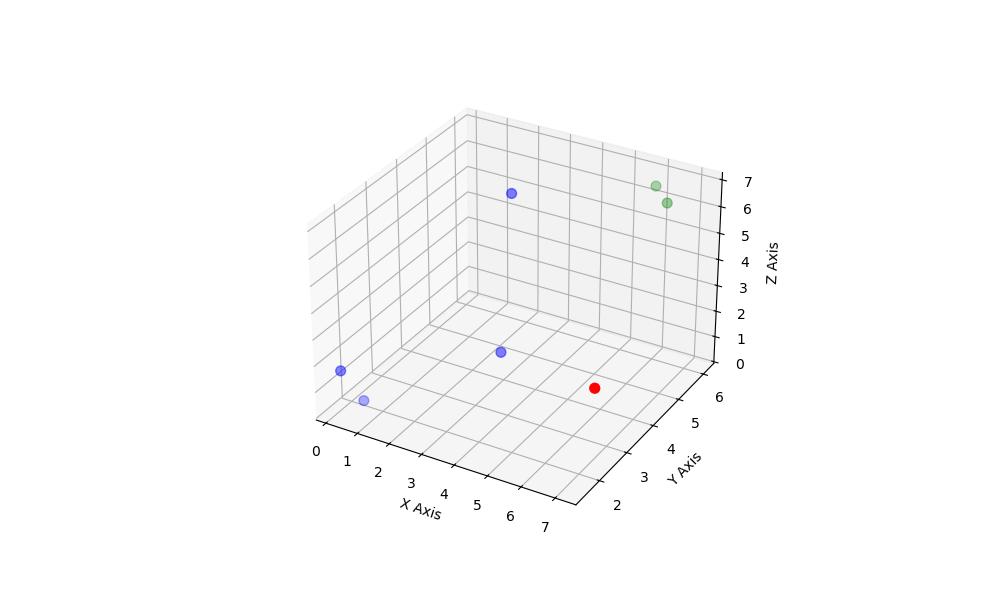

In [22]:
# update the distance_matrix
for min_tuple in min_tuples:
    for i in range(len(x)):
        if distance_matrix[min_tuple[1]][i] <= distance_matrix[min_tuple[2]][i]:
            distance_matrix[min_tuple[2]][i] = distance_matrix[min_tuple[1]][i]
        else:
            distance_matrix[min_tuple[1]][i] = distance_matrix[min_tuple[2]][i]

# Get the min non-zero value and its index for each row
min_values_with_indices = [get_min_with_index(row) for row in distance_matrix]

# Filter out tuples where the value is None
valid_values = [(value, row_index, col_index) for row_index, (value, col_index) in enumerate(min_values_with_indices) if value is not None]
valid_values

min_value = min(valid_values, key=lambda x: x[0])[0] if valid_values else None

min_tuples = [tup for tup in valid_values if tup[0] == min_value]
min_tuples

common_color = fixed_colors[min_tuples[0][1]]  
colors[min_tuples[0][1]] = common_color 
colors[min_tuples[0][2]] = common_color

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [23]:
# update the distance_matrix
for min_tuple in min_tuples:
    for i in range(len(x)):
        if distance_matrix[min_tuple[1]][i] <= distance_matrix[min_tuple[2]][i]:
            distance_matrix[min_tuple[2]][i] = distance_matrix[min_tuple[1]][i]
        else:
            distance_matrix[min_tuple[1]][i] = distance_matrix[min_tuple[2]][i]

# Get the min non-zero value and its index for each row
min_values_with_indices = [get_min_with_index(row) for row in distance_matrix]

# Filter out tuples where the value is None
valid_values = [(value, row_index, col_index) for row_index, (value, col_index) in enumerate(min_values_with_indices) if value is not None]
valid_values

[]